In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

### df_products Data Description

`df_products`, contains descriptive information about individual products listed on Amazon. Each row represents a unique product identified by its `id`. The columns provide various attributes of these products, which can be used to understand their characteristics and popularity.

Here's a breakdown of each column:

*   **`id`**:
    *   **Data Type**: Integer
    *   **Description**: Unique identifier for each product. This ID is used to link products in the `df_copurchase` DataFrame, acting as the node identifier in the product network.
    *   **Example**: `1`, `2`, `3`, `4`, `5`, ...

*   **`title`**:
    *   **Data Type**: String (Text)
    *   **Description**: The name or title of the product. This provides a textual description of what the product is.
    *   **Example**: "Patterns of Preaching: A Sermon Sampler", "Candlemas: Feast of Flames", etc.

*   **`group`**:
    *   **Data Type**: String (Categorical)
    *   **Description**:  The category or group the product belongs to. This helps in understanding the product type (e.g., Book, Music, DVD, etc.).
    *   **Example**: "Book"

*   **`salesrank`**:
    *   **Data Type**: Float
    *   **Description**: Amazon sales rank of the product. A lower `salesrank` indicates higher sales and popularity. This is a common metric to gauge how well a product is selling on Amazon.
    *   **Example**: `396585.0`, `168596.0`, `1270652.0`, etc.

*   **`review_cnt`**:
    *   **Data Type**: Integer
    *   **Description**:  The number of customer reviews received for the product. A higher `review_cnt` can indicate greater product visibility, popularity, or customer engagement.
    *   **Example**: `2`, `12`, `1`, `1`, `0`, etc.

*   **`downloads`**:
    *   **Data Type**: Integer
    *   **Description**: The number of downloads associated with the product.  The exact meaning might depend on the dataset source. It could represent digital product downloads, or potentially another engagement metric.  In the context of "Book" products in the example, it might represent sample downloads, or perhaps a different type of engagement relevant to the dataset.
    *   **Example**: `2`, `12`, `1`, `1`, `0`, etc.

*   **`rating`**:
    *   **Data Type**: Float
    *   **Description**: The average customer rating of the product, typically on a scale of 0 to 5 (or similar). This reflects the overall customer satisfaction and perceived quality of the product.
    *   **Example**: `5.0`, `4.5`, `5.0`, `4.0`, `0.0`, etc.

In [4]:
df_products = pd.read_csv('products.csv')

df_products.head()

,id,title,group,salesrank,review_cnt,downloads,rating
0,1,Patterns of Preaching: A Sermon Sampler,Book,396585.0,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,168596.0,12,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1270652.0,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,1,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,455160.0,0,0,0.0


## df_copurchase Data Description
`df_copurchase` represents the co-purchasing relationships between products. Each row signifies a directed relationship: if a customer purchased the product in the `Source` column, they were also likely to purchase the product in the `Target` column.

Here's a breakdown of each column:

*   **`Source`**:
    *   **Data Type**: Integer
    *   **Description**: Identifier of the product that was initially purchased (product ID-X as described in the project description). This column acts as the source node in the co-purchasing graph. It corresponds to the `id` column in the `df_products` DataFrame.
    *   **Example**: `1`, `1`, `1`, `1`, `2`, ...

*   **`Target`**:
    *   **Data Type**: Integer
    *   **Description**: Identifier of the product that was co-purchased with the 'Source' product (product ID-Y). This column acts as the target node in the co-purchasing graph. It also corresponds to the `id` column in the `df_products` DataFrame.
    *   **Example**: `2`, `4`, `5`, `15`, `11`, ...

In [3]:
df_copurchase = pd.read_csv('copurchase.csv')

df_copurchase.head()

,Source,Target
0,1,2
1,1,4
2,1,5
3,1,15
4,2,11


## Data Exploration

**Pertanyaan untuk df_products:**
1. Correlation Matrix antara salesrank, review count, download, rating

**Pertanyaan untuk df_copurchase:**
1. Jumlah row dalam df_copurchase
   * Berapa banyak total hubungan co-purchasing yang ada dalam dataset? Ini adalah jumlah baris dalam df_copurchase.
2. Top-5 produk yang paling banyak menjadi co-purchasing (source) (out-degree)
   * Produk mana yang paling sering menjadi "Source" dalam df_copurchase? Ini mengindikasikan produk mana yang pembeliannya paling sering diikuti dengan pembelian produk lain. Hitung out-degree setiap node (produk).
   * Visualisasikan top produk dengan out-degree tertinggi (misalnya dengan bar chart).
3. Top-5 produk yang paling banyak di co-purchase (target) (in-degree)
   * Produk mana yang paling sering menjadi "Target" dalam df_copurchase? Ini mengindikasikan produk mana yang paling sering dibeli bersamaan dengan produk lain. Hitung in-degree setiap node (produk).
   * Visualisasikan top produk dengan in-degree tertinggi (misalnya dengan bar chart).
4. Distribusi In-degree (di-copurchase) dan Out-degree (co-purchasing)
   * Contohnya, untuk in-degree, bagaimana distribusinya (node dengan in-degree 0 ada berapa, 1 ada berapa, etc.)
   * Visualisasikan
5. Produk yang tidak pernah masuk ke df_copurchase (cek source, target, atau keduanya)
   * Identifikasi produk-produk yang tidak muncul sebagai "Source" atau "Target" dalam df_copurchase. Produk-produk ini tidak memiliki hubungan co-purchasing dalam dataset.
   * Apakah ada karakteristik khusus dari produk-produk ini (misalnya group, salesrank, dll.)?

**Pertanyaan untuk keduanya:**
1. Hitung in-degree dan out-degree untuk masing-masing produk, kemudian gabungkan ke df_products dan hitung korelasi antara
   salesrank, review count, download, rating, in-degree, out-degree
   * Gunakan scatter plot atau boxplot untuk visualisasi dan hitung korelasi jika relevan.
2. Hitung statistics co-purchsing (in-degree, out-degree) untuk masing-masing group.
3. Hitung konektivitas untuk masing-masing group (e.g., jumlah koneksi out-degree dan in-degree dalam group dan keluar group)
4. Hitung hubungan antar group (e.g., untuk group A, hitung out-degree ke group B, C, D, dst dan
   in-degree dari group B, C, D, dst. ke group A) 

---

EDA Alek

1. Pertanyaan untuk keduanya #3: Hitung konektivitas untuk masing-masing group (e.g., jumlah koneksi out-degree dan in-degree dalam group dan keluar group)

2. Pertanyaan untuk keduanya #4: Hitung hubungan antar group (e.g., untuk group A, hitung out-degree ke group B, C, D, dst dan in-degree dari group B, C, D, dst. ke group A)
---

1. Pertanyaan untuk keduanya #3: Hitung konektivitas untuk masing-masing group (e.g., jumlah koneksi out-degree dan in-degree dalam group dan keluar group)

In [ ]:
# Menggabungkan DataFrame untuk mendapatkan atribut group untuk Source dan Target
df_merged = pd.merge(df_copurchase, df_products[['id', 'group']],
                     left_on='Source', right_on='id', how='left')
df_merged.rename(columns={'group': 'source_group'}, inplace=True)
df_merged.drop('id', axis=1, inplace=True)

# Gabungkan untuk mendapatkan group produk target
df_merged = pd.merge(df_merged, df_products[['id', 'group']],
                     left_on='Target', right_on='id', how='left')
df_merged.rename(columns={'group': 'target_group'}, inplace=True)
df_merged.drop('id', axis=1, inplace=True)

# Tambahkan kolom yang menandai apakah koneksi berada dalam group yang sama
df_merged['same_group'] = df_merged['source_group'] == df_merged['target_group']

# Menghitung out-degree untuk masing-masing source group
out_degree = df_merged.groupby('source_group').apply(lambda x: pd.Series({
    'total_out': len(x),
    'out_in_group': x['same_group'].sum(),
    'out_out_group': (~x['same_group']).sum()
})).reset_index().rename(columns={'source_group': 'group'})

# Menghitung in-degree untuk masing-masing target group
in_degree = df_merged.groupby('target_group').apply(lambda x: pd.Series({
    'total_in': len(x),
    'in_in_group': x['same_group'].sum(),
    'in_out_group': (~x['same_group']).sum()
})).reset_index().rename(columns={'target_group': 'group'})

# Menggabungkan hasil perhitungan out-degree dan in-degree
connectivity = pd.merge(out_degree, in_degree, on='group', how='outer')

connectivity


C:\Users\ACER V15\AppData\Local\Temp\ipykernel_42644\1682951581.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out_degree = df_merged.groupby('source_group').apply(lambda x: pd.Series({
C:\Users\ACER V15\AppData\Local\Temp\ipykernel_42644\1682951581.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  in_degree = df_merged.groupby('target_group').apply(lambda x: pd.Series({


,group,total_out,out_in_group,out_out_group,total_in,in_in_group,in_out_group
0,Baby Product,5,0,5,3,0,3
1,Book,885615,637893,247722,884954,637893,247061
2,CE,12,0,12,5,0,5
3,DVD,45077,3043,42034,44764,3043,41721
4,Music,230758,45806,184952,231895,45806,186089
5,Software,10,0,10,7,0,7
6,Toy,11,0,11,20,0,20
7,Video,59517,3372,56145,59360,3372,55988
8,Video Games,5,0,5,3,0,3


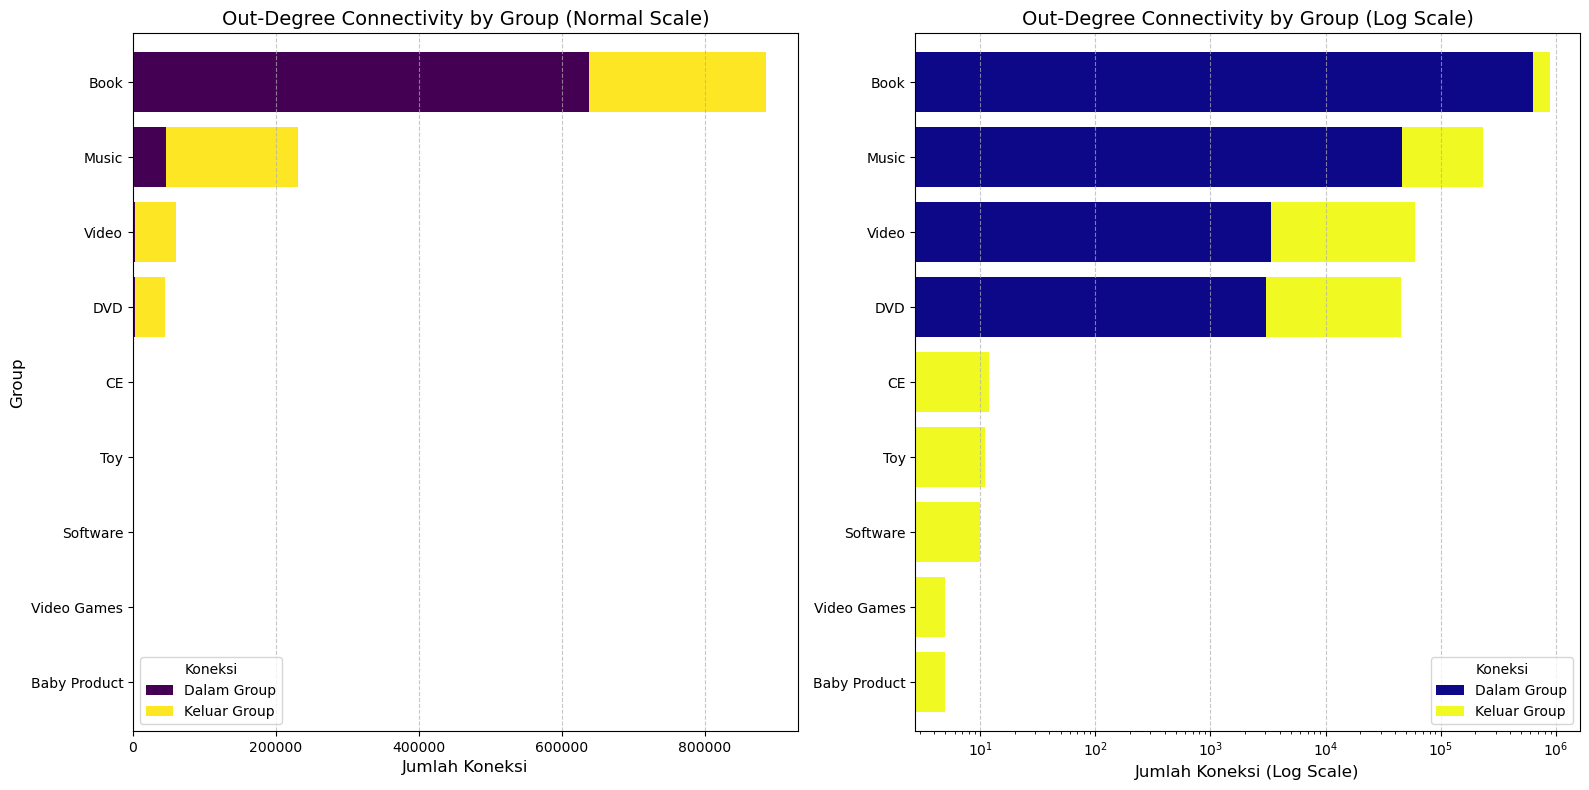

In [28]:
import numpy as np

# Urutkan data berdasarkan total_out secara menurun
connectivity_sorted = connectivity.sort_values(by='total_out', ascending=True)

# Buat DataFrame untuk plot menggunakan out_in_group dan out_out_group
plot_data = connectivity_sorted[['group', 'out_in_group', 'out_out_group']].set_index('group')

# Buat figure dengan 2 subplot: normal scale dan log scale
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot dengan skala normal
plot_data.plot(kind='barh', stacked=True, colormap='viridis', width=0.8, ax=ax[0])
ax[0].set_title("Out-Degree Connectivity by Group (Normal Scale)", fontsize=14)
ax[0].set_xlabel("Jumlah Koneksi", fontsize=12)
ax[0].set_ylabel("Group", fontsize=12)
ax[0].legend(title="Koneksi", labels=["Dalam Group", "Keluar Group"])
ax[0].grid(axis='x', linestyle='--', alpha=0.7)

# Plot dengan skala log
plot_data.plot(kind='barh', stacked=True, colormap='plasma', width=0.8, ax=ax[1])
ax[1].set_xscale('log')
ax[1].set_title("Out-Degree Connectivity by Group (Log Scale)", fontsize=14)
ax[1].set_xlabel("Jumlah Koneksi (Log Scale)", fontsize=12)
ax[1].set_ylabel("") 
ax[1].legend(title="Koneksi", labels=["Dalam Group", "Keluar Group"])
ax[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Berdasarkan hasil EDA:

- Dominasi Kategori Book: Kategori Book menunjukkan jumlah koneksi yang sangat tinggi, dengan proporsi koneksi internal yang signifikan. Hal ini mengindikasikan bahwa pelanggan yang membeli buku cenderung membeli buku lain.

- Pembelian Lintas Kategori: Untuk banyak kategori lain (seperti DVD, Music, dan Video), mayoritas koneksi terjadi lintas kategori. Ini menunjukkan adanya kecenderungan pembelian produk yang tidak terbatas pada satu kategori saja, melainkan melibatkan berbagai kategori produk.

- Konektivitas Rendah di Beberapa Kategori: Kategori seperti Baby Product, CE, Software, Toy, dan Video Games memiliki konektivitas yang relatif rendah, dengan hampir seluruh koneksi terjadi lintas kategori. Hal ini bisa mengindikasikan baik keterbatasan data maupun pola pembelian yang berbeda di kategori tersebut.

Secara keseluruhan, pola co-purchase di jaringan produk ini memperlihatkan bahwa banyak pembelian internal bersama di kategori Book, tapi terdapat banyak pembelian juga yang terjadi di lintas kategori (Book, Music, Video, DVD). Hal ini mencerminkan perilaku pembelian yang beragam di antara pelanggan.

---

2. Pertanyaan untuk keduanya #4: Hitung hubungan antar group (e.g., untuk group A, hitung out-degree ke group B, C, D, dst dan in-degree dari group B, C, D, dst. ke group A)

In [ ]:
# Buat pivot table untuk menghitung hubungan antar group
out_degree_matrix = df_merged.pivot_table(index='source_group',
                                          columns='target_group',
                                          values='Source',
                                          aggfunc='count',
                                          fill_value=0)

out_degree_matrix

target_group,Baby Product,Book,CE,DVD,Music,Software,Toy,Video,Video Games
source_group,,,,,,,,,
Baby Product,0,4,0,1,0,0,0,0,0
Book,2,637893,3,31007,164433,5,13,42241,3
CE,0,7,0,1,4,0,0,0,0
DVD,1,31269,0,3043,8078,0,1,2193,0
Music,0,163471,2,8063,45806,0,4,10905,0
Software,0,7,0,0,2,0,0,1,0
Toy,0,9,0,0,1,0,0,1,0
Video,0,42329,0,2146,11007,2,2,3372,0
Video Games,0,5,0,0,0,0,0,0,0


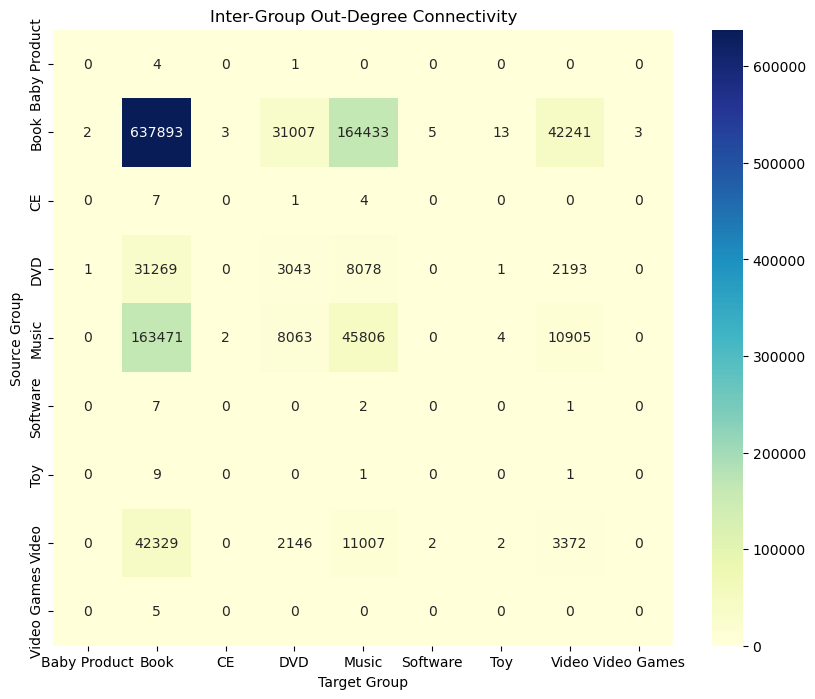

In [14]:
# Visualisasikan menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(out_degree_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Inter-Group Out-Degree Connectivity")
plt.xlabel("Target Group")
plt.ylabel("Source Group")
plt.show()

Berdasarkan hasil matriks konektivitas antar grup, dapat disimpulkan bahwa:

- Pembelian bersama dalam kategori Book sangat banyak dilakukan
- Pembelian produk kategori DVD, Music, dan Video biasa dibarengi dengan pembelian produk kategori Book, DVD, Music, atau Video, begitu juga sebaliknya
- Pembelian bersama produk kategori Baby Product, CE, Software, Toy, Video Games hampir selalu dibareng pembelian produk kategori Book  